In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


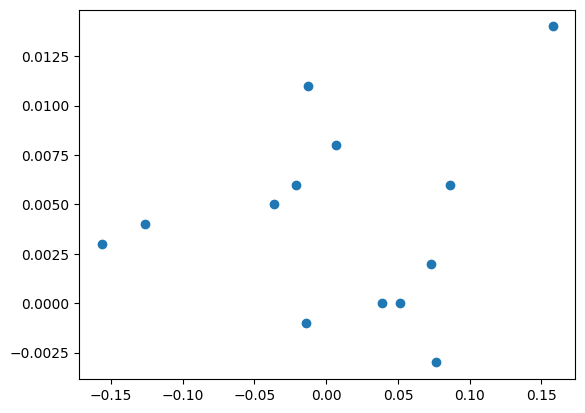

In [5]:
dfs = pd.read_excel('inflation_rm.xlsx')
plt.scatter(dfs.iloc[:,-1],dfs.iloc[:,1])

[ 2.69570548e+00 -1.91456184e-03]


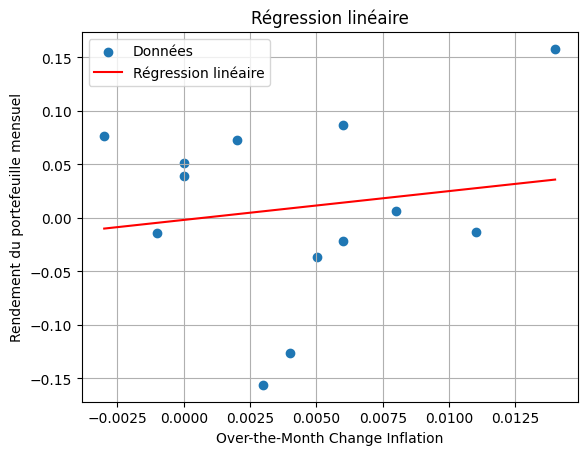

In [8]:
x= dfs.iloc[:,-1].to_numpy()
y=dfs.iloc[:,1].to_numpy()


coefficients = np.polyfit(x, y, 1)
print(coefficients)
m = coefficients[0]  # Coefficient directeur
b = coefficients[1]  # Terme constant

# Créer les valeurs prédites avec la droite de régression
x_pred = np.linspace(min(x), max(x), 100)
y_pred = m * x_pred + b

# Tracer les nuages de points et la droite de régression
plt.scatter(x, y, label='Données')
plt.plot(x_pred, y_pred, color='red', label='Régression linéaire')
plt.xlabel('Over-the-Month Change Inflation')
plt.ylabel('Rendement du portefeuille mensuel')
plt.legend()
plt.title('Régression linéaire')
plt.grid(True)
plt.show()


In [16]:
def interpolation_(X,Y):
    f_=np.zeros((len(Y),len(Y)))
    f_[0]=Y

    for i in range(len(Y)):
        for j in range(len(Y)-i-1):
            f_[i+1][j]=(f_[i][j+1]-f_[i][j])/(X[j+1+i]-X[j])


    result=""
    for i in range(len(Y)):
        r=str(f_[len(Y)-i-1][0])
        for j in range(len(Y)-i-1):
            if(X[j]<0):
                 r=r+"(x+" +str(abs(X[j]))+")"
            else:
                r=r+"(x-" +str(X[j])+")"
        if(f_[len(Y)-i-1][0]<0):
             result=result+r
        else:
             result=result+"+"+r
        
    return result

In [3]:
X=[-5000,-4000,-3000,-2000,-1000,0,1000,2000,3000,4000,5000,6000, 7000]
Y=[-135,-(17*110)/27,-40,-270/11,-10,0,400/60,90/11,10,110/9,15,130/7,70/3]

In [6]:
interpolation_(X,Y)

'+2.583912898617486e-42(x+5000)(x+4000)(x+3000)(x+2000)(x+1000)(x-0)(x-1000)(x-2000)(x-3000)(x-4000)(x-5000)(x-6000)+-1.706194386970402e-38(x+5000)(x+4000)(x+3000)(x+2000)(x+1000)(x-0)(x-1000)(x-2000)(x-3000)(x-4000)(x-5000)+1.0031049768704095e-34(x+5000)(x+4000)(x+3000)(x+2000)(x+1000)(x-0)(x-1000)(x-2000)(x-3000)(x-4000)+-5.329140167103133e-31(x+5000)(x+4000)(x+3000)(x+2000)(x+1000)(x-0)(x-1000)(x-2000)(x-3000)+2.599991315269094e-27(x+5000)(x+4000)(x+3000)(x+2000)(x+1000)(x-0)(x-1000)(x-2000)+-1.1387018331462777e-23(x+5000)(x+4000)(x+3000)(x+2000)(x+1000)(x-0)(x-1000)+3.907126823793489e-20(x+5000)(x+4000)(x+3000)(x+2000)(x+1000)(x-0)+-5.625701459034776e-17(x+5000)(x+4000)(x+3000)(x+2000)(x+1000)+-4.075476992143669e-13(x+5000)(x+4000)(x+3000)(x+2000)+3.779461279461283e-09(x+5000)(x+4000)(x+3000)+-1.824074074074075e-05(x+5000)(x+4000)+0.06574074074074075(x+5000)+-135.0'

In [7]:
def interpolation_t(X,Y, x):
    f_=np.zeros((len(Y),len(Y)))
    f_[0]=Y

    for i in range(len(Y)):
        for j in range(len(Y)-i-1):
            f_[i+1][j]=(f_[i][j+1]-f_[i][j])/(X[j+1+i]-X[j])


    result=0
    for i in range(len(Y)):
        r=f_[len(Y)-i-1][0]
        for j in range(len(Y)-i-1):
            r=r*(x- X[j])
        result=result+r
        
    return result

In [17]:
interpolation_([-5000,-4000,-3000],[-135,-(17*110)/27,-40])

'-1.824074074074075e-05(x+5000)(x+4000)+0.06574074074074075(x+5000)-135.0'

In [12]:
interpolation_t(X,Y, 0)

-2.842170943040401e-14

In [18]:
X=[-5000,-4000,-3000,-2000,-1000,0,1000,2000,3000,4000,5000,6000, 7000]
Z=[-48.46153846,-17.14285714,-17.14285714,-10,-10,0 , 4.285714286,4.285714286,4.285714286, 4.285714286,5.384615385, 5.384615385,6.666666667]

In [21]:
interpolation_(X,Z)
#forme simplifié
interpolation_([-5000,-4000,-3000],[-48.46153846,-17.14285714,-17.14285714])

'-1.565934066e-05(x+5000)(x+4000)+0.03131868132(x+5000)-48.46153846'